In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMAGE_SIZE = 640
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plants/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 2343 images belonging to 13 classes.


In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plants/valid',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 669 images belonging to 13 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plants/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 331 images belonging to 13 classes.


In [6]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 13

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 319, 319, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 158, 158, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 78, 78, 64)        0

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=60

)

Epoch 1/60
10/10 [==============================] - 410s 41s/step - loss: 2.5443 - accuracy: 0.0969 - val_loss: 2.5269 - val_accuracy: 0.1042
Epoch 2/60
10/10 [==============================] - 429s 43s/step - loss: 2.4364 - accuracy: 0.1625 - val_loss: 2.1490 - val_accuracy: 0.2500
Epoch 3/60
10/10 [==============================] - 367s 36s/step - loss: 1.9401 - accuracy: 0.3531 - val_loss: 1.6641 - val_accuracy: 0.4844
Epoch 4/60
10/10 [==============================] - 365s 36s/step - loss: 1.6043 - accuracy: 0.4500 - val_loss: 1.7167 - val_accuracy: 0.4427
Epoch 5/60
10/10 [==============================] - 348s 34s/step - loss: 1.4789 - accuracy: 0.5219 - val_loss: 1.4004 - val_accuracy: 0.5365
Epoch 6/60
10/10 [==============================] - 359s 36s/step - loss: 1.1620 - accuracy: 0.5844 - val_loss: 1.0476 - val_accuracy: 0.6302
Epoch 7/60
10/10 [==============================] - 360s 36s/step - loss: 0.7840 - accuracy: 0.7063 - val_loss: 1.0423 - val_accuracy: 0.6927
Epoch 

In [10]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

scores = model.evaluate(test_generator)
print("Test Accuracy:", scores[1])

Training Accuracy: 0.953125
Validation Accuracy: 0.953125
11/11 [==============================] - 168s 14s/step - loss: 0.1377 - accuracy: 0.9547
Test Accuracy: 0.9546827673912048


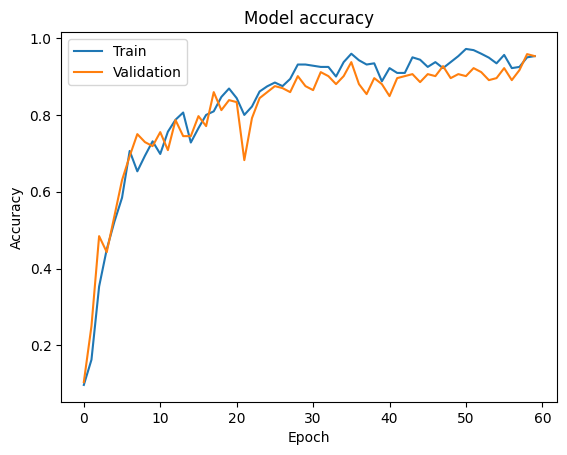

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Add this line
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
class_names = list(train_generator.class_indices.keys())
class_names

['Common Lanthana',
 'Hibiscus',
 'Jatropha',
 'Marigold',
 'Rose',
 'champaka',
 'chitrak',
 'honeysuckle',
 'indian mallow',
 'malabar melastome',
 'shankupushpam',
 'spider lily',
 'sunflower']

In [13]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 215ms/step


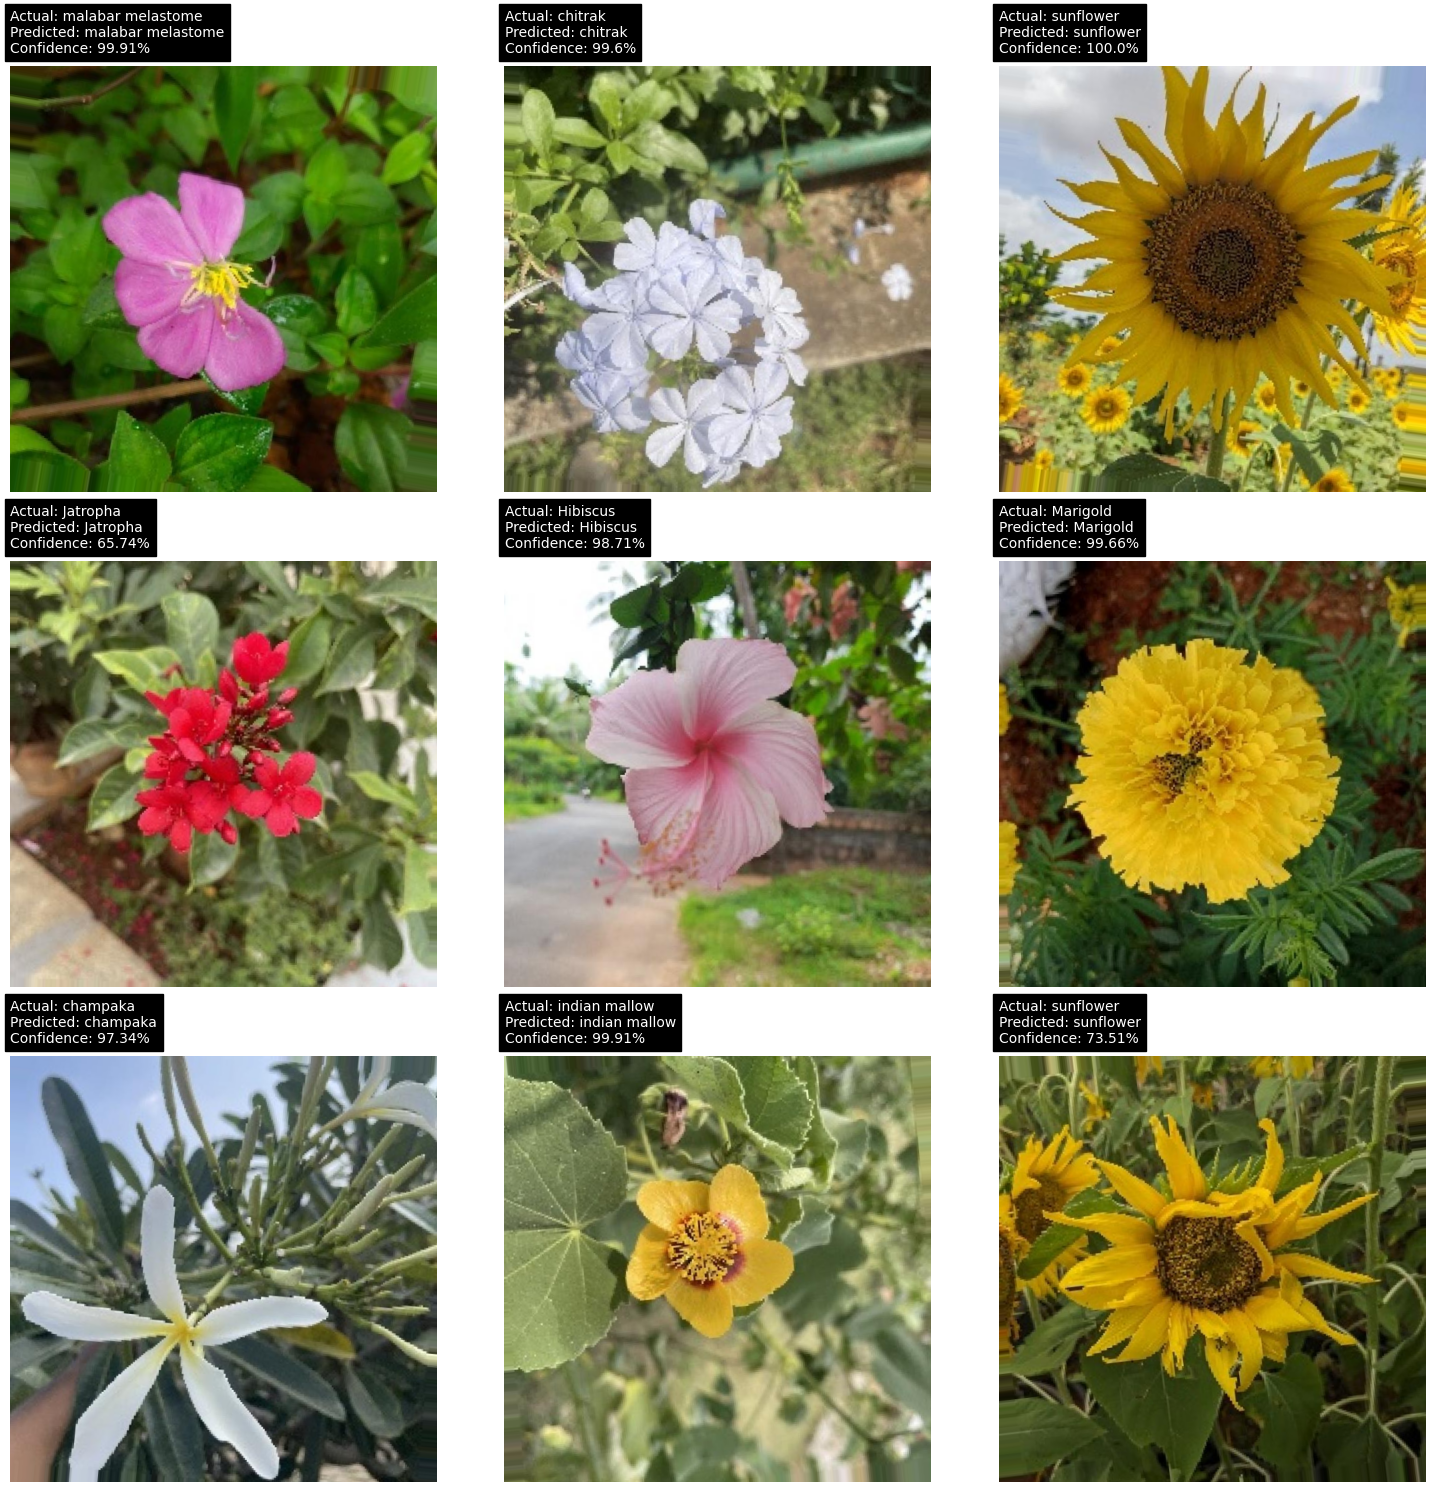

In [24]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(min(9, len(images))):  # تحقق من أن عدد الصور لا يتجاوز 9
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # قم بالتنبؤ بالصورة
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        # قم بإعداد النص المعلوماتي
        text = f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%"

        # إضافة النص إلى الصورة
        plt.text(0, -20, text, color='white', fontsize=10, ha='left', backgroundcolor='black')

    # اكتمل العرض للصور، فقط استمر إذا كانت هناك مزيد من الصور للعرض
    break

plt.tight_layout()  # ضبط التخطيط
plt.show()  # عرض الشكل

first image to predict
actual label: indian mallow
1/1 [==============================] - 8s 8s/step
predicted label: indian mallow


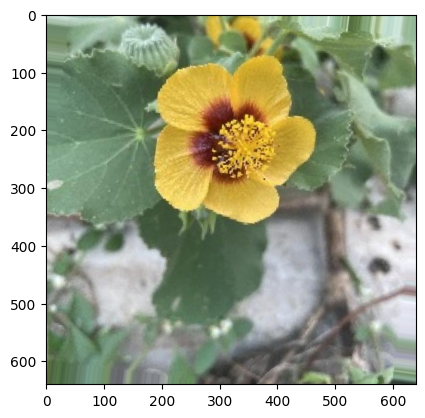

In [23]:

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [22]:
model.save('/content/drive/MyDrive/Plant_Islandddddddddddd.h5')